In [1]:
# 4/25 기준
from transformers import pipeline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
qa = pipeline("question-answering")
sentiment = pipeline("sentiment-analysis")


No model was supplied, defaulted to distilbert-base-cased-distilled-squad (https://huggingface.co/distilbert-base-cased-distilled-squad)
2022-04-29 13:59:36.957692: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.
All model checkpoint layers were used when initializing TFDistilBertForQuestionAnswering.

All the layers of TFDistilBertForQuestionAnswering were initialized from the model checkpoint at distilbert-base-cased-distilled-squad.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForQuestionAnswering for predictions without further training.
No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)
Some layers from the model checkpoint at distilbert-base-uncased-finetuned-sst-2-english were not used when initializing TFDi

In [44]:
from pykrx import stock
pykrx_df = stock.get_market_ohlcv_by_date(fromdate='2021-04-25', todate='2022-04-25', ticker="035720", adjusted=False)
pykrx = pykrx_df.reset_index()

In [50]:
target = pd.DataFrame(pykrx.loc[:,['날짜','등락률']]).reset_index()
target = target.drop('index',axis=1)
target['날짜'] = pd.to_datetime(target['날짜'],format='%Y-%m-%d')

target

,날짜,등락률
0,2021-04-26,0.43
1,2021-04-27,2.97
2,2021-04-28,-1.65
3,2021-04-29,-2.09
4,2021-04-30,-2.99
...,...,...
242,2022-04-19,0.74
243,2022-04-20,0.00
244,2022-04-21,-1.58
245,2022-04-22,-1.71


In [55]:
resampled_target = pd.DataFrame(target.resample(rule='1W', on='날짜'))
resampled_target

temp = []
for i in range(len(resampled_target)):
    temp.append(resampled_target[1][i].mean())

week_rate_mean = pd.DataFrame(temp)
week_rate_mean.to_csv('/Users/junho/Desktop/data/final_csv/kakao_rate_mean')

/var/folders/4l/84htqxwn14n0jr_xvdc4tpbr0000gn/T/ipykernel_5728/1019736527.py:6: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  temp.append(resampled_target[1][i].mean())


In [59]:
week_price_mean = pd.read_csv('/Users/junho/Desktop/data/final_csv/kakao_week_mean.csv')

In [3]:
translated_article = list(pd.read_csv('/Users/junho/Desktop/data/final_csv/translate_article.csv')['0'])
date = list(pd.read_csv('/Users/junho/Desktop/data/final_csv/date.csv')['data'])

article_table = pd.DataFrame()
article_table['date'] = date
article_table['translated_article'] = translated_article
article_table['date'] = pd.to_datetime(article_table['date'],format='%Y-%m-%d')
article_table

,date,translated_article
0,2022-04-25,"73 52 -weeks, including Naver, is a high -end ..."
1,2022-04-25,-This 35 million residents of Chao Yang-gu thr...
2,2022-04-21,Mirae Asset Securities announced on the 21st t...
3,2022-04-20,Korea Investment & Securities Korea Investment...
4,2022-04-18,NAVER sales of 1.8 trillion won and Kakao sale...
...,...,...
437,2021-05-03,Reporter Shin Woong -su = KOSPI index is appea...
438,2021-05-02,KOSPI and KOSDAQ showed four consecutive days ...
439,2021-05-02,KOSPI and KOSDAQ showed four consecutive days ...
440,2021-04-29,Investors are already consulting at the Korea ...


In [30]:
question = 'Is the stock of the Kakao Company going up?'
data = []
for i in range(len(translated_article)):
    ans = qa(question = question, context = translated_article[i])
    senti = sentiment(ans.get('answer'))
    print(ans)
    print(senti)
    data.append(senti)

/Users/junho/tensorflow_macos_venv/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:708: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  tensor = as_tensor(value)
/Users/junho/tensorflow_macos_venv/lib/python3.8/site-packages/transformers/pipelines/question_answering.py:298: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  p_mask = np.asarray(


{'score': 0.013775031082332134, 'start': 1190, 'end': 1216, 'answer': "Kakao Group's shareholders"}
[{'label': 'POSITIVE', 'score': 0.9953798055648804}]
{'score': 0.016402196139097214, 'start': 381, 'end': 386, 'answer': 'empty'}
[{'label': 'NEGATIVE', 'score': 0.9997498393058777}]
{'score': 0.007096478249877691, 'start': 124, 'end': 176, 'answer': 'The stocks listed this time are 38 index -type calls'}
[{'label': 'NEGATIVE', 'score': 0.9953208565711975}]
{'score': 0.4683855473995209, 'start': 1146, 'end': 1173, 'answer': 'KakaoTalk channel True ELW.'}
[{'label': 'POSITIVE', 'score': 0.968518853187561}]
{'score': 0.3051234483718872, 'start': 2276, 'end': 2287, 'answer': '150,000 won'}
[{'label': 'POSITIVE', 'score': 0.9996310472488403}]
{'score': 0.17509329319000244, 'start': 2813, 'end': 2842, 'answer': 'Kakao stock 288.3 billion won'}
[{'label': 'POSITIVE', 'score': 0.9871339201927185}]
{'score': 0.058320216834545135, 'start': 2162, 'end': 2194, 'answer': 'the stock can be fully rebo

{'score': 0.029674377292394638, 'start': 4148, 'end': 4190, 'answer': 'We will eliminate the problem of platforms'}
[{'label': 'POSITIVE', 'score': 0.8592580556869507}]
{'score': 0.016667727380990982, 'start': 4276, 'end': 4318, 'answer': 'We will eliminate the problem of platforms'}
[{'label': 'POSITIVE', 'score': 0.8592580556869507}]
{'score': 0.006587843876332045, 'start': 724, 'end': 741, 'answer': 'It is in progress'}
[{'label': 'POSITIVE', 'score': 0.9994015693664551}]
{'score': 0.07252327352762222, 'start': 3107, 'end': 3154, 'answer': 'the third place is Kakao Games 1606 billion won'}
[{'label': 'POSITIVE', 'score': 0.9543678164482117}]
{'score': 0.3628356158733368, 'start': 74, 'end': 135, 'answer': 'the company is accelerating the departure of the stock market'}
[{'label': 'NEGATIVE', 'score': 0.9982473850250244}]
{'score': 0.02188795432448387, 'start': 3239, 'end': 3295, 'answer': 'The connection with KakaoTalk will also be strengthened.'}
[{'label': 'POSITIVE', 'score': 0.9

{'score': 0.17455439269542694, 'start': 197, 'end': 229, 'answer': 'The stock price has risen by 16%'}
[{'label': 'POSITIVE', 'score': 0.9845579266548157}]
{'score': 0.050971031188964844, 'start': 1998, 'end': 2041, 'answer': 'The price drops 3.40% from the previous day'}
[{'label': 'NEGATIVE', 'score': 0.9993165731430054}]
{'score': 0.4906260371208191, 'start': 2449, 'end': 2523, 'answer': 'the company is speeding up its global market by acquiring global companies'}
[{'label': 'POSITIVE', 'score': 0.9976309537887573}]
{'score': 0.11269006133079529, 'start': 1190, 'end': 1210, 'answer': 'KOSDAQ dropped 3.75%'}
[{'label': 'NEGATIVE', 'score': 0.998345136642456}]
{'score': 0.05796874314546585, 'start': 1157, 'end': 1163, 'answer': 'rising'}
[{'label': 'POSITIVE', 'score': 0.9995211362838745}]
{'score': 0.18916070461273193, 'start': 1551, 'end': 1579, 'answer': 'the stock price will rebound'}
[{'label': 'POSITIVE', 'score': 0.9987700581550598}]
{'score': 0.030712468549609184, 'start': 104

{'score': 0.18085215985774994, 'start': 1317, 'end': 1371, 'answer': 'Foreigners and institutions buy Naver and Kakao stocks'}
[{'label': 'POSITIVE', 'score': 0.5848625898361206}]
{'score': 0.058627963066101074, 'start': 131, 'end': 191, 'answer': 'large game stocks have been alienated at the market industry'}
[{'label': 'NEGATIVE', 'score': 0.9983780384063721}]
{'score': 0.060473259538412094, 'start': 88, 'end': 92, 'answer': 'rose'}
[{'label': 'POSITIVE', 'score': 0.9995088577270508}]
{'score': 0.051446583122015, 'start': 73, 'end': 133, 'answer': 'large game stocks have been alienated at the market industry'}
[{'label': 'NEGATIVE', 'score': 0.9983780384063721}]
{'score': 0.035541944205760956, 'start': 2738, 'end': 2753, 'answer': 'it ranked No. 1'}
[{'label': 'POSITIVE', 'score': 0.9983574748039246}]
{'score': 0.28790006041526794, 'start': 1512, 'end': 1581, 'answer': 'If you sell stocks at this point, you have to lose significant losses'}
[{'label': 'NEGATIVE', 'score': 0.999271214

{'score': 0.020247766748070717, 'start': 1709, 'end': 1740, 'answer': 'it is expected to be profitable'}
[{'label': 'POSITIVE', 'score': 0.9978989362716675}]
{'score': 0.23476874828338623, 'start': 2030, 'end': 2072, 'answer': 'Kakao fell from 163,000 won to 11,6500 won'}
[{'label': 'NEGATIVE', 'score': 0.998364269733429}]
{'score': 0.07660594582557678, 'start': 2626, 'end': 2668, 'answer': 'Kakao fell from 163,000 won to 11,6500 won'}
[{'label': 'NEGATIVE', 'score': 0.998364269733429}]
{'score': 0.31977924704551697, 'start': 2118, 'end': 2169, 'answer': 'the stock price of battery companies is also strong'}
[{'label': 'POSITIVE', 'score': 0.9992528557777405}]
{'score': 0.04289522022008896, 'start': 1254, 'end': 1326, 'answer': 'low -cost buying movements are appearing in that it has fallen about 25%'}
[{'label': 'NEGATIVE', 'score': 0.9997139573097229}]
{'score': 0.11517263203859329, 'start': 391, 'end': 454, 'answer': 'the stock price has risen three consecutive days until this day'}

{'score': 0.12099739164113998, 'start': 954, 'end': 994, 'answer': 'Kakao Bank is showing a significant rise'}
[{'label': 'POSITIVE', 'score': 0.9995005130767822}]
{'score': 0.021549802273511887, 'start': 164, 'end': 196, 'answer': 'The stock price fell to 7430 won'}
[{'label': 'NEGATIVE', 'score': 0.9991449117660522}]
{'score': 0.16924096643924713, 'start': 1219, 'end': 1223, 'answer': 'rose'}
[{'label': 'POSITIVE', 'score': 0.9995088577270508}]
{'score': 0.012451737187802792, 'start': 1935, 'end': 2005, 'answer': 'fallen more than 4 trillion won due to the recent drop in stock prices'}
[{'label': 'NEGATIVE', 'score': 0.9992772936820984}]
{'score': 0.09820882230997086, 'start': 385, 'end': 420, 'answer': 'Craepon stocks closed at 49,500 won'}
[{'label': 'NEGATIVE', 'score': 0.9322255253791809}]
{'score': 0.15717412531375885, 'start': 1230, 'end': 1234, 'answer': 'rose'}
[{'label': 'POSITIVE', 'score': 0.9995088577270508}]
{'score': 0.009012198075652122, 'start': 118, 'end': 179, 'answ

{'score': 0.022247275337576866, 'start': 161, 'end': 205, 'answer': 'attracting interest in the stock price trend'}
[{'label': 'POSITIVE', 'score': 0.9992614388465881}]
{'score': 0.06426168233156204, 'start': 997, 'end': 1010, 'answer': 'public stocks'}
[{'label': 'POSITIVE', 'score': 0.8241894245147705}]
{'score': 0.09057029336690903, 'start': 316, 'end': 353, 'answer': 'Kakao rose 3.82%from the previous day'}
[{'label': 'POSITIVE', 'score': 0.9981879591941833}]
{'score': 0.07636189460754395, 'start': 1783, 'end': 1828, 'answer': 'The increase in the stock market has expanded'}
[{'label': 'POSITIVE', 'score': 0.9992716908454895}]
{'score': 0.009423429146409035, 'start': 586, 'end': 647, 'answer': 'the market cap in the KOSDAQ market also rose to second place'}
[{'label': 'NEGATIVE', 'score': 0.6100198030471802}]
{'score': 0.15448732674121857, 'start': 1555, 'end': 1619, 'answer': 'Game stocks were shaken not only in the Chinese Hong Kong market'}
[{'label': 'NEGATIVE', 'score': 0.8825

{'score': 0.2169986367225647, 'start': 1267, 'end': 1326, 'answer': 'Kakao Games shares fell 5.33% from the previous trading day'}
[{'label': 'NEGATIVE', 'score': 0.9994309544563293}]
{'score': 0.03323420509696007, 'start': 1344, 'end': 1426, 'answer': 'the company provides opportunities to invest in companies in the pre -public stage'}
[{'label': 'POSITIVE', 'score': 0.999649167060852}]
{'score': 0.017176490277051926, 'start': 774, 'end': 808, 'answer': 'Operating profit was lowered 18.2%'}
[{'label': 'NEGATIVE', 'score': 0.9989157915115356}]
{'score': 0.12648910284042358, 'start': 448, 'end': 486, 'answer': 'Odin Up was second in Kakem and KOSDAQ'}
[{'label': 'POSITIVE', 'score': 0.9671121835708618}]
{'score': 0.0323718897998333, 'start': 2057, 'end': 2132, 'answer': 'the fight over the second place is expected to continue for the time being.'}
[{'label': 'NEGATIVE', 'score': 0.707666277885437}]
{'score': 0.0732131078839302, 'start': 2328, 'end': 2364, 'answer': "MTS's utilization ha

{'score': 0.2114955186843872, 'start': 3601, 'end': 3647, 'answer': 'There is also room for the stock price to rise'}
[{'label': 'NEGATIVE', 'score': 0.9990308284759521}]
{'score': 0.019845815375447273, 'start': 2772, 'end': 2808, 'answer': 'the stock price adjustment was fully'}
[{'label': 'POSITIVE', 'score': 0.9957841038703918}]
{'score': 0.02157939411699772, 'start': 2664, 'end': 2740, 'answer': 'the company advised that sales were improved according to the economic cycle'}
[{'label': 'POSITIVE', 'score': 0.676420271396637}]
{'score': 0.010555232875049114, 'start': 764, 'end': 795, 'answer': 'increased by 70%more than usual'}
[{'label': 'POSITIVE', 'score': 0.9993785619735718}]
{'score': 0.019874004647135735, 'start': 1422, 'end': 1492, 'answer': 'Shinhan Investment Corp. also expanded US stock free market order time'}
[{'label': 'POSITIVE', 'score': 0.9958058595657349}]
{'score': 0.08296793699264526, 'start': 1223, 'end': 1232, 'answer': '25%to 30%'}
[{'label': 'POSITIVE', 'score'

In [31]:
score = []
for i in data:
    if i[0]['label'] == 'NEGATIVE':
        score.append(-i[0]['score'])
    else:
        score.append(i[0]['score'])

len(score)

442

In [32]:
date_score = pd.DataFrame()
date_score['date'] = date
date_score['date'] = pd.to_datetime(date_score['date'],format='%Y-%m-%d')


date_score['score'] = score

resampled_week = pd.DataFrame(date_score.resample(rule='1W', on='date'))

temp = []
for i in range(len(resampled_week)):
    temp.append(resampled_week[1][i].mean().score)

week_mean = pd.DataFrame(temp)

/var/folders/4l/84htqxwn14n0jr_xvdc4tpbr0000gn/T/ipykernel_5728/1042392469.py:12: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  temp.append(resampled_week[1][i].mean().score)


In [ ]:
question_tbl = pd.DataFrame()

In [36]:
#question_tbl['question1'] = week_mean # 'Will the stock price of cacao go up?'
#question_tbl['question2'] = week_mean # 'Is cacao growing?'
question_tbl['question3'] = week_mean # 'Is cacao growing?'

question_tbl

,question2,question1,question3
0,0.420655,-0.501771,-0.503562
1,0.265869,0.496300,0.715384
2,0.598848,0.406858,0.454324
3,-0.115972,-0.170329,-0.176874
4,0.429637,0.164453,0.707713
5,0.999013,0.985687,0.986117
6,0.990227,0.990395,0.924912
7,0.623333,0.217349,0.319667
8,0.681961,0.342514,0.802863
9,0.555210,0.072171,-0.198102


In [37]:
split_score_df = week_mean
split_span = 10
split_list = []

for i in range(len(split_score_df)-split_span):
    split_list.append(split_score_df[i:i+split_span].mean())


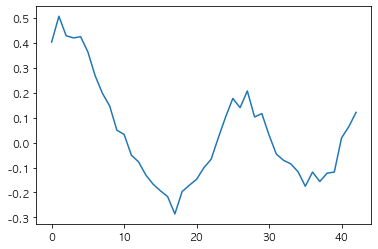

In [38]:
plt.plot(split_list)

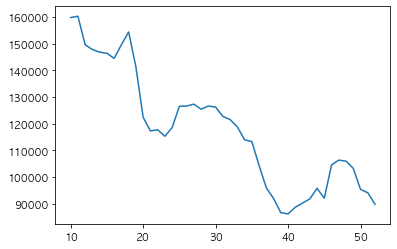

In [60]:
plt.plot(week_price_mean['Close'][split_span:])

In [236]:
sub_df = question_tbl
sub_df['mean_price'] = week_price_mean['Close']
sub_df['mean_rate'] = week_rate_mean['등락률']
sub_df

,question2,question1,question3,mean_price,mean_rate
0,0.420655,-0.501771,-0.503562,117900.0,-0.6660
1,0.265869,0.496300,0.715384,114875.0,0.2225
2,0.598848,0.406858,0.454324,112400.0,-0.9700
3,-0.115972,-0.170329,-0.176874,113500.0,1.7900
4,0.429637,0.164453,0.707713,120200.0,0.8660
5,0.999013,0.985687,0.986117,125500.0,0.3400
6,0.990227,0.990395,0.924912,130500.0,1.7940
7,0.623333,0.217349,0.319667,146600.0,2.7520
8,0.681961,0.342514,0.802863,159000.0,0.0440
9,0.555210,0.072171,-0.198102,159100.0,0.6540


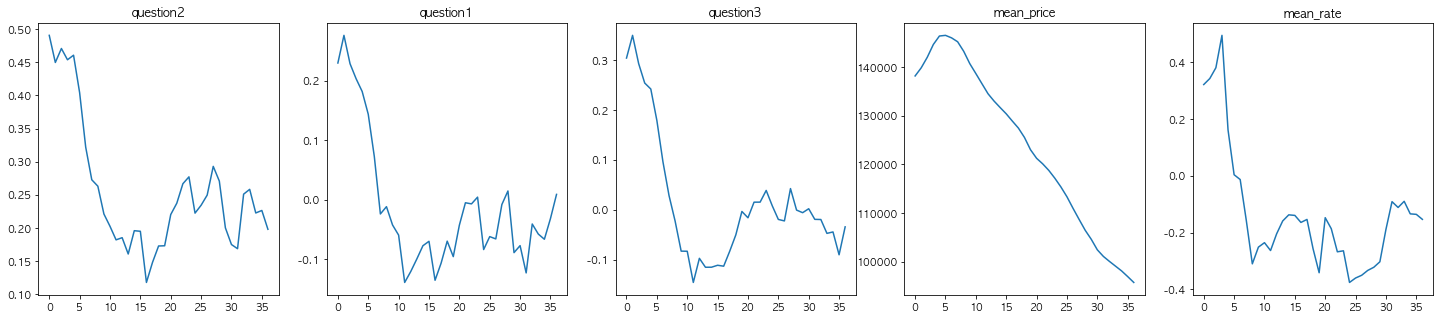

In [237]:
split_score_df = sub_df
split_span = 16
split_list = []
fig = plt.figure(figsize=(25,5))
for idx in range(5): # column
    temp = []
    for i in range(len(split_score_df.iloc[:,idx])-split_span):
        temp.append(split_score_df.iloc[i:i+split_span,idx].mean())
    split_list.append(temp)
    fig = plt.subplot(1,5,idx+1)
    plt.plot(temp)
    plt.title(split_score_df.columns[idx])


In [238]:
sub_df = pd.DataFrame(split_list).transpose()
sub_df

,0,1,2,3,4
0,0.490585,0.229968,0.303930,138142.1875,0.321531
1,0.449661,0.276548,0.349458,139804.6875,0.342844
2,0.470742,0.228818,0.292902,141975.0000,0.380812
3,0.453752,0.203536,0.253844,144600.0000,0.494938
4,0.460634,0.181981,0.241889,146337.5000,0.161687
5,0.404082,0.143662,0.178825,146475.0000,0.003688
6,0.321922,0.072379,0.096014,145959.3750,-0.013187
7,0.272654,-0.024285,0.028360,145159.3750,-0.156437
8,0.262957,-0.011994,-0.022672,143200.0000,-0.310313
9,0.220949,-0.042830,-0.083184,140668.7500,-0.251500


In [266]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

lr = LinearRegression()
quad = PolynomialFeatures(degree=2) # ,include_bias=False
input_idx = len(sub_df) - 1

features = [0,1,2]

X = sub_df.loc[:,features]
y = sub_df.loc[:,4]
X_quad = quad.fit_transform(X)
lr.fit(X_quad,y)
y_quad_fit = lr.predict(quad.fit_transform(X))

pred = y_quad_fit

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(pred,y)
rmse = np.sqrt(mse)
print(rmse)
print(r2_score(pred,y)) # 1에 가까울수록 강한 상관관계, 0일 수록 관계없음
print(1-(1-r2_score(pred,y))*(input_idx-1)/(input_idx-len(features)))

0.08505894007306038
0.8077742714820255
0.796124227329421


In [263]:
len(y_quad_fit)

37

In [264]:
temp_score_df = sub_df
temp_score_df['pred'] = pred
temp_score_df

,0,1,2,3,4,pred
0,0.490585,0.229968,0.303930,138142.1875,0.321531,0.365822
1,0.449661,0.276548,0.349458,139804.6875,0.342844,0.374979
2,0.470742,0.228818,0.292902,141975.0000,0.380812,0.361016
3,0.453752,0.203536,0.253844,144600.0000,0.494938,0.306797
4,0.460634,0.181981,0.241889,146337.5000,0.161687,0.214242
5,0.404082,0.143662,0.178825,146475.0000,0.003688,0.107086
6,0.321922,0.072379,0.096014,145959.3750,-0.013187,-0.105758
7,0.272654,-0.024285,0.028360,145159.3750,-0.156437,-0.279771
8,0.262957,-0.011994,-0.022672,143200.0000,-0.310313,-0.181970
9,0.220949,-0.042830,-0.083184,140668.7500,-0.251500,-0.187227


rmse : 0.0851
r2 : 0.8078
prediction : -0.1841
true : -0.15359379351139069


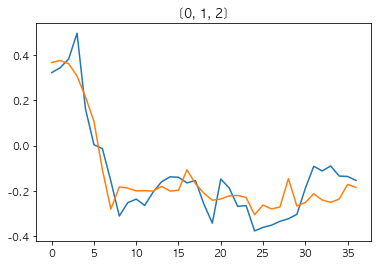

In [265]:
import matplotlib.pyplot as plt
plt.plot(range(len(temp_score_df)),temp_score_df[4]) # rate
plt.plot(range(len(temp_score_df)),temp_score_df['pred'])
plt.title(f"{features}")

print(f'rmse : {round(rmse,4)}')
print(f'r2 : {round(r2_score(pred,y),4)}') # 1에 가까울수록 강한 상관관계, 0일 수록 관계없음
print(f'prediction : {round(lr.predict(quad.fit_transform(np.array(sub_df.loc[len(temp_score_df)-1,features]).reshape(1,-1)))[0],4)}')

print(f'true : {temp_score_df.iloc[-1,4]}')

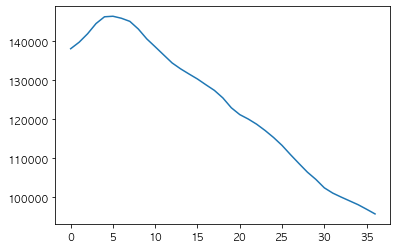

In [267]:
plt.plot(range(len(temp_score_df)),temp_score_df[3]) # rate


In [274]:
kakao_price = pd.read_csv('/Users/junho/Desktop/data/final_csv/kakao.csv')
Close = pd.DataFrame(kakao_price.loc[77:322,['Date','Close']]).reset_index()
Close['Date'] = pd.to_datetime(Close['Date'],format='%Y-%m-%d')
Close = Close.drop('index',axis=1)

Close

,Date,Close
0,2021-04-26,118000.0
1,2021-04-27,121500.0
2,2021-04-28,119500.0
3,2021-04-29,117000.0
4,2021-04-30,113500.0
...,...,...
241,2022-04-19,95100.0
242,2022-04-20,95100.0
243,2022-04-21,93600.0
244,2022-04-22,92000.0


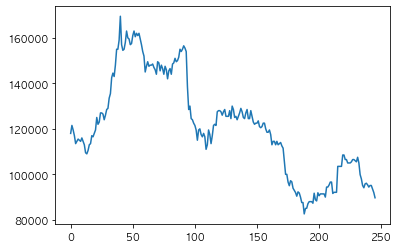

In [275]:
plt.plot(range(len(Close)),Close['Close']) # rate